In [61]:
import numpy as np
import matplotlib.pyplot as plt

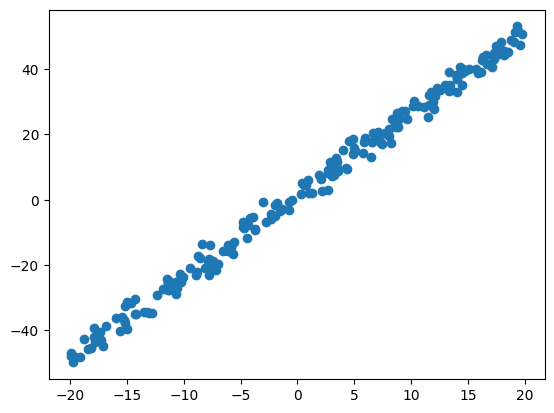

In [62]:
m = 2.5
c = 1.8
X = np.random.uniform(-20, 20, 200)
y = m*X + c + np.random.normal(0,2, len(X))
plt.scatter(X, y)

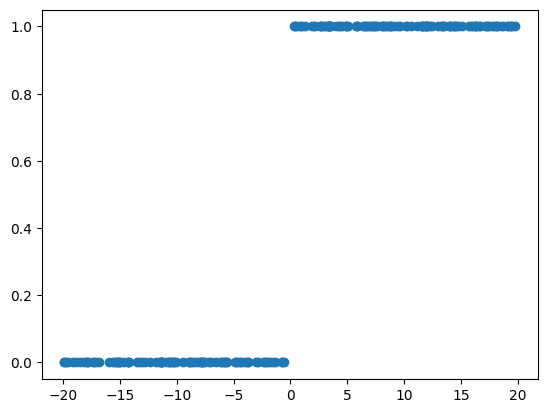

In [63]:
y = np.where(y < 0, 0, 1)
plt.scatter(X, y)

In [64]:
w1 = 0.5
w2 = 0.3

In [65]:
def sigmoid(n):
    s = 1/(1+np.exp(-n))
    return s

In [66]:
#forward prop..
h_in = w1*X
h_out = sigmoid(h_in)
o_in = w2*h_out
o_out = sigmoid(o_in)
cost = np.mean((o_out - y)**2)
cost

np.float64(0.21638626469562014)

In [67]:
# Back Prop...\
delta_cost_oout = (o_out - y)
delta_oout_oin = sigmoid(o_in) * (1-sigmoid(o_in))
delta_oin_w2 = h_out
d_w2 = np.mean(delta_cost_oout * delta_oout_oin * delta_oin_w2)
d_w2

np.float64(-0.05071998685080031)

In [68]:
d_w1 = np.mean((o_out - y) * sigmoid(o_in) * (1 - sigmoid(o_in)) * w2 * sigmoid(h_in) * (1 - sigmoid(h_in)) * X)
d_w1, d_w2, cost

(np.float64(-0.004959078292318781),
 np.float64(-0.05071998685080031),
 np.float64(0.21638626469562014))

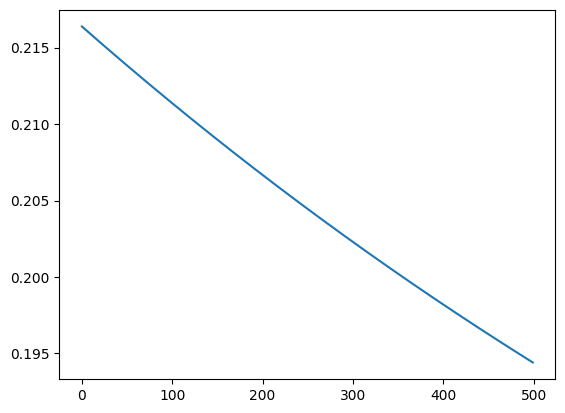

In [69]:
costs = []
lr = 0.01
for i in range(500):
    #forward prop..
    h_in = w1*X
    h_out = sigmoid(h_in)
    o_in = w2*h_out
    o_out = sigmoid(o_in)
    cost = np.mean((o_out - y)**2)
    costs.append(cost)

    # Back Prop...\
    delta_cost_oout = (o_out - y)
    delta_oout_oin = sigmoid(o_in) * (1-sigmoid(o_in))
    delta_oin_w2 = h_out

    d_w2 = np.mean(delta_cost_oout * delta_oout_oin * delta_oin_w2)

    d_w1 = np.mean((o_out - y) * sigmoid(o_in) * (1 - sigmoid(o_in)) * w2 * sigmoid(h_in) * (1 - sigmoid(h_in)) * X)

    w1 = w1 - lr*d_w1
    w2 = w2 - lr*d_w2

d_w1, d_w2, cost
plt.plot(costs)